# Homework 2

# Pricing Diamonds


The dataset contains the following features.
- price : price of the dimaond in dollars.

- carat : weight of the diamond

- cut : quality of the cut

- color : color of the diamond, J (worst) to D (best)

- clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

- x : length (mm) 

- y :  width (mm) 

- z : depth (mm) 

- depth : 2 * z / (x + y)

- table :  width of top of diamond relative to widest point



## Your job

- Try to understand the data, visualize it. You may use unsupervised learning methods at this stage.
- The main aim is then to predict, using supervised learning methods, the price of diamonds based on their different quality features.

## We want to see the following things

- Prediction results and mean squared error obtained on the test set for the methods you considered.
- A discussion about the impact of the hyperparameters of the methods on your predictions.
- A clear comparison between your solutions (a table, and/or plots comparing the results obtained with different methods).
- A discussion about the difficulties encountered if applicable.
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did efficient calibration of the methods and serious comparisons between different methods
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Hand in your assignment  before 11/11/20 23h55 :

- via Moodle for all Université de Paris students
- via email for Paris 1 students, subject [Machine Learning DM2], aurelie.fischer@univ-paris-diderot.fr


## Example of methods

Unsupervised learning methods and visualization :
- PCA
- k-means
- mixture models
- spectral clustering
...

Supervised learning methods :
- discriminant analysis
- logistic regression
- SVM
- regression trees
- bagging
- random forests
- boosting
- ...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("husl")
import matplotlib.pyplot as plt
%matplotlib inline
# Permet a une cellule d'avoir plus d'un display en sortie
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

shuffle data, create quantitative variables, 

In [2]:
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.drop("Unnamed: 0",axis =1, inplace=True)

In [3]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamond_df.shape

(53940, 10)

In [7]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [22]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
print(diamond_df["cut"].unique())
print(diamond_df["color"].unique())
print(diamond_df["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [4]:
# Using the pandas function to create dummy data from categorical values
# creates too many columns as it involves one-hot encoding
# It would be better to use this method as it keeps things tidy and we
# can control better the value for each characteristic
    
clarity_class = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}
cut_class = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_class = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

In [5]:
# Creation of column volume from columns x,y,z

diamond_df['volume'] = diamond_df['x']*diamond_df['y']*diamond_df['z']
# Delete this columns or leave them?? since we already have the volumne
diamond_df.drop(['x','y','z'],axis=1,inplace=True)

diamond_df = diamond_df[diamond_df['volume']<1000] 
#To delete any outlier??

In [6]:
# Creating categorical variables for 'cut', 'color', and 'clarity'
# We will change our method by using the previously created dicts for each of these columns
#diamond_df = pd.get_dummies(diamond_df, columns=["cut", "color", "clarity"])

diamond_df['cut'] = diamond_df['cut'].map(cut_class)
diamond_df['clarity'] = diamond_df['clarity'].map(clarity_class)
diamond_df['color'] = diamond_df['color'].map(color_class)

In [7]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


### All this data transformations are for us to be able to perform analytics of all variables when using unsupervised and supervised learning methods. Comparing the variables between them and obtain insight into the relationship between variables

# Data Visualization

In [212]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


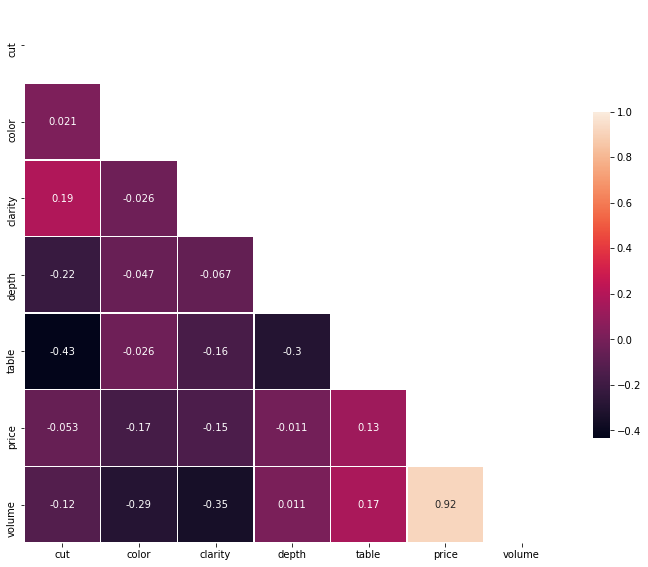

In [15]:
# Correlation between variables but with a mask for upper triangle because it is a mirro image of the 
# lower triangle

corr = diamond_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, mask=mask, vmax=1, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Distribution of Diamond Volume')

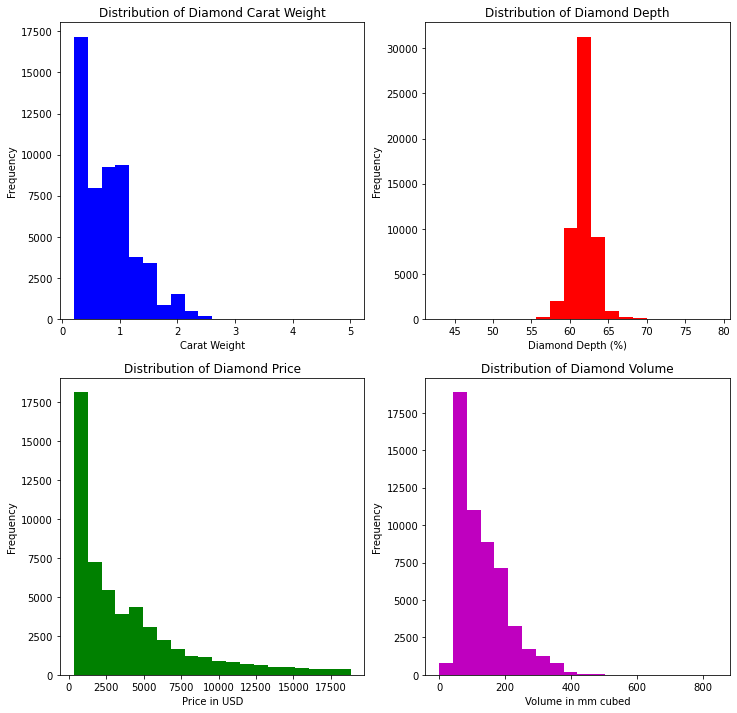

In [16]:
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(diamond_df['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(diamond_df['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(diamond_df['price'],bins=20,color='g')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

# Fourth subplot showing the diamond volume distribution
plt.subplot(224)
plt.hist(diamond_df['volume'],bins=20,color='m')
plt.xlabel('Volume in mm cubed')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Volume')

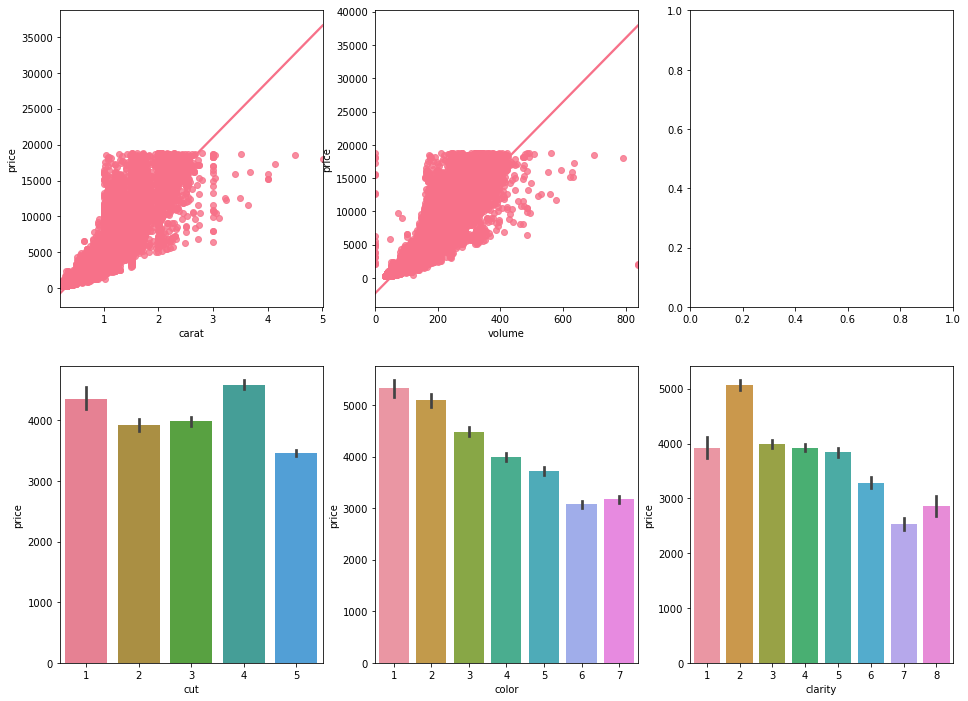

In [17]:
fig, axis = plt.subplots(2, 3,figsize=(16,12))

sns.regplot(x = 'carat', y = 'price', data=diamond_df, ax = axis[0,0])

# This is the reason we need to eliminate outliers!!
sns.regplot(x = 'volume', y = 'price', data=diamond_df, ax = axis[0,1])

# Order the plots from worst to best
#sns.barplot(x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], data=diamond_df, ax = axis[1,0])
#sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=diamond_df, ax = axis[1,1])
#sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=diamond_df, ax = axis[1,2])

# Order the plots from worst to best
sns.barplot(x = 'cut', y = 'price',  data=diamond_df, ax = axis[1,0])
sns.barplot(x = 'color', y = 'price', data=diamond_df, ax = axis[1,1])
sns.barplot(x = 'clarity', y = 'price', data=diamond_df, ax = axis[1,2])

# Unsupervised learning

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [208]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


We need to normalize the values of the dataset because the learning methods are very affected by the scale of values>!!

In [215]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']
# Separating out the features
X = diamond_df.loc[:, features].values
# Separating out the target
y = diamond_df.loc[:,['price']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [154]:
X.shape, y.shape

((53939, 7), (53939, 1))

## PCA

In [128]:
k = 7
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, diamond_df[['price']]], axis = 1)

In [ ]:
finalDf.head()

In [201]:
# calculate cumulative sum of explained variances
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

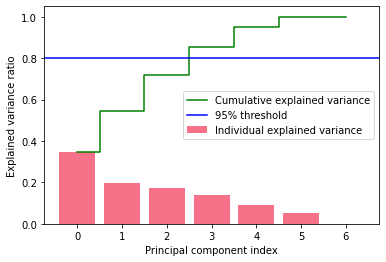

In [205]:
# Plot explained variances
plt.bar(range(k), var_exp,label='Individual explained variance')
plt.step(range(k), cum_var_exp,color="g", where='mid', label='Cumulative explained variance')
plt.axhline(y=0.8, color='b', linestyle='-', label="95% threshold")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

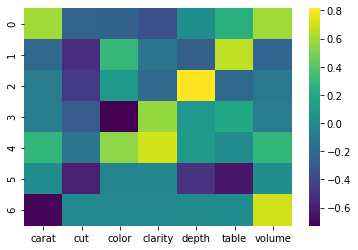

In [206]:
hmap = pd.DataFrame(pca.components_,columns=features)
sns.heatmap(hmap,cmap='viridis')

In [207]:
hmap.head()

,carat,cut,color,clarity,depth,table,volume
0,0.595239,-0.233452,-0.241697,-0.343595,0.023637,0.253098,0.591691
1,-0.212193,-0.531803,0.307510,-0.127507,-0.261536,0.666870,-0.219596
2,-0.093655,-0.470133,0.104122,-0.202369,0.814259,-0.208211,-0.109723
3,-0.081744,-0.288844,-0.728786,0.568073,0.096837,0.197377,-0.087845
4,0.287564,-0.126650,0.551682,0.708301,0.106661,0.008677,0.289434


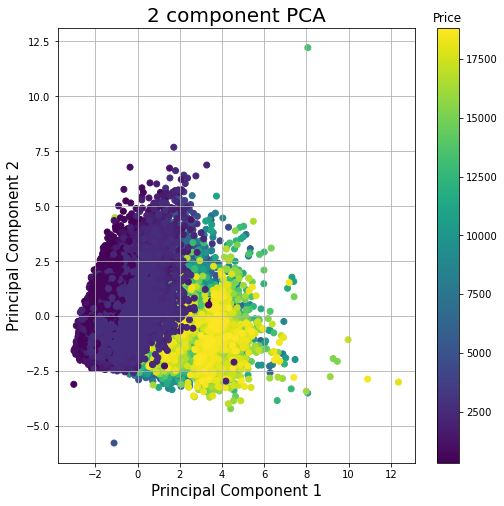

In [199]:
plt.figure(figsize = (8,8))
sc = plt.scatter(x=finalDf[0], y=finalDf[1], c=finalDf["price"])

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.colorbar(sc).ax.set_title('Price')
plt.grid()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
lr = LogisticRegression(multi_class='auto', solver='sag')

# fit and transform data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lr.fit(X_train_pca, y_train)

/home/jlechuga/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## K-Means

In [49]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


In [200]:
data_transformed

NameError: name 'data_transformed' is not defined

In [14]:
mms = MinMaxScaler()
mms.fit(diamond_df)
data_transformed = mms.transform(diamond_df)

In [28]:
data_transformed.shape

(53939, 8)

In [30]:
Sum_of_squared_distances = []
K = range(1,15)
for k in range(1,15):
    print("Testing K clusters: %i"%k)
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

Testing K clusters: 1
Testing K clusters: 2
Testing K clusters: 3
Testing K clusters: 4
Testing K clusters: 5
Testing K clusters: 6
Testing K clusters: 7
Testing K clusters: 8
Testing K clusters: 9
Testing K clusters: 10
Testing K clusters: 11
Testing K clusters: 12
Testing K clusters: 13
Testing K clusters: 14


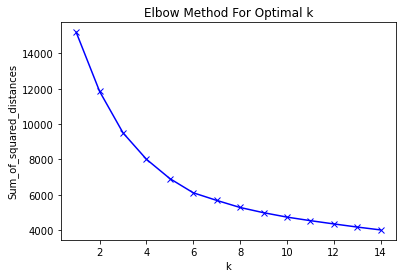

In [31]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

In [81]:
kmeans = KMeans(n_clusters=6).fit(data_transformed)
centroids = kmeans.cluster_centers_
centroids.shape
kmeans.c

(6, 8)

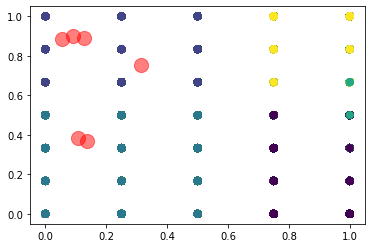

In [75]:
plt.scatter(data_transformed[:, 1], data_transformed[:, 2], c=kmeans.labels_.astype(float), s=50, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5);

In [52]:
data_transformed.shape

(53939, 8)

In [79]:
#for c1, c2, c3, c4, c5, c6, c7, c8 in data_transformed:  
#    print("{} | {} | {} | {} | {} | {} | {} | {}".format(c1, c2, c3, c4, c5, c6, c7, c8))

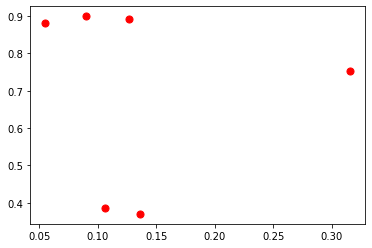

In [50]:
#plt.scatter(diamond_df['carat'], diamond_df['price'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# Supervised Learning

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [196]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']
# Separating out the features
X = diamond_df.loc[:, features]
# Separating out the target
y = diamond_df.loc[:,['price']]

In [197]:
X.head()

,carat,cut,color,clarity,depth,table,volume
0,0.23,5,6,2,61.5,55.0,38.202030
1,0.21,4,6,3,59.8,61.0,34.505856
2,0.23,2,6,5,56.9,65.0,38.076885
3,0.29,4,2,4,62.4,58.0,46.724580
4,0.31,2,1,2,63.3,58.0,51.917250


In [198]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Regression

In [200]:
linR = LinearRegression()
linR.fit(X_train, y_train)

LinearRegression()

In [201]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [202]:
predictedLR = linR.predict(X_test)
predictedLR = predictedLR.reshape((predictedLR.shape[0], 1))
expected = y_test

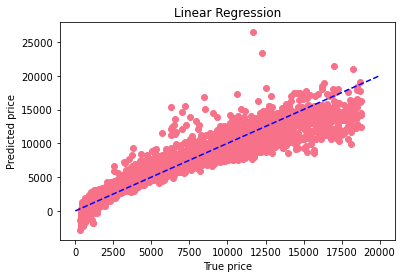

Price RMS: $1187.76
Accuracy score: 90.93%


In [229]:
plt.scatter(expected, predictedLR)
plt.plot([0, 20000], [0, 20000], '--k', color="b")
plt.axis('tight')
plt.title('Linear Regression')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()
print("Price RMS: ${0:.2f}".format(np.sqrt(np.mean((predictedLR - expected) ** 2))[0]))
print("Accuracy score: {0:.2f}%".format(linR.score(X_test, y_test)*100))

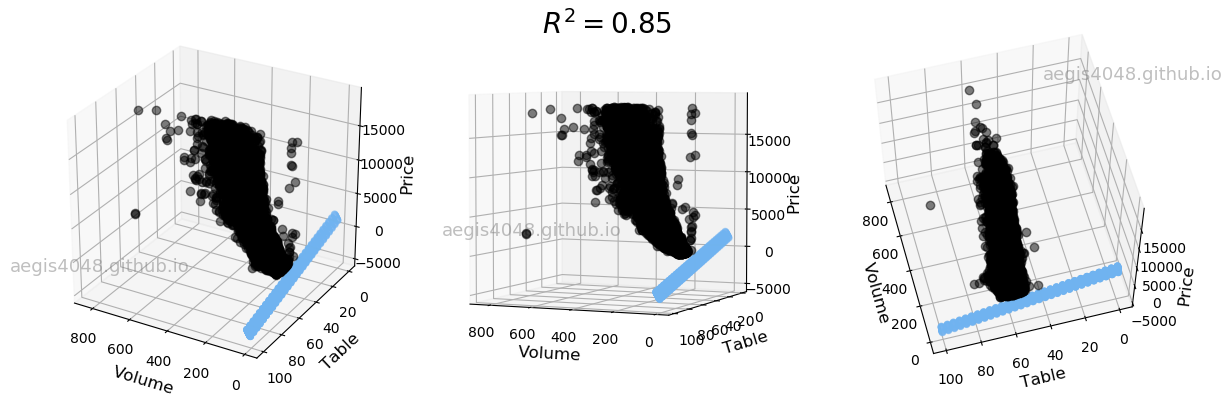

In [154]:
#Unrelated to above part
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################


X1 = diamond_df[['volume', 'table']].values.reshape(-1,2)
Y = diamond_df['price']

######################## Prepare model data point for visualization ###############################

x = X1[:, 0]
y = X1[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30) 
y_pred = np.linspace(0, 100, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X1, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X1, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Volume', fontsize=12)
    ax.set_ylabel('Table', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

## Gradient Boosting Tree Regression

In [210]:
from sklearn.ensemble import GradientBoostingRegressor

In [211]:
gBoost = GradientBoostingRegressor()
gBoost.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor()

In [212]:
predictedgBoost = gBoost.predict(X_test)
predictedgBoost = predictedgBoost.reshape((predictedgBoost.shape[0], 1))
expected = y_test

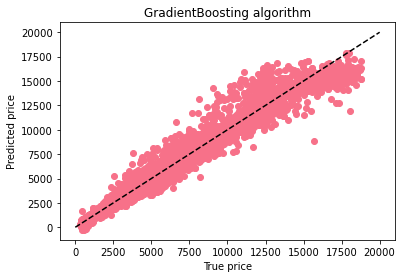

Price RMS: $613.46
Accuracy score: 97.58%


In [230]:
plt.scatter(expected, predictedgBoost)
plt.plot([0, 20000], [0, 20000], '--k')
plt.axis('tight')
plt.title('GradientBoosting algorithm')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()
print("Price RMS: ${0:.2f}".format(np.sqrt(np.mean((predictedgBoost - expected) ** 2))[0]))
print("Accuracy score: {0:.2f}%".format(gBoost.score(X_test, y_test)*100))

## AdaBoost

In [175]:
from sklearn.ensemble import AdaBoostRegressor

In [176]:
adaBoost = AdaBoostRegressor()
adaBoost.fit(X_train, y_train.values.ravel())

AdaBoostRegressor()

In [177]:
predicted = adaBoost.predict(X_test)
predicted = predicted.reshape((predicted.shape[0], 1))
expected = y_test

RMS: price    1130.43771
dtype: float64
Score:  91.90542733948097


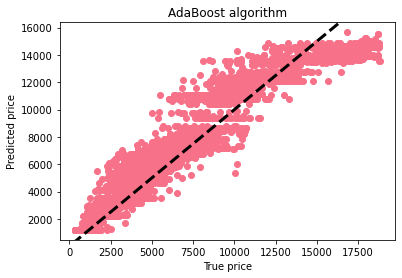

In [180]:
plt.scatter(expected, predicted) 
plt.title('AdaBoost algorithm')
plt.xlabel('True price')
plt.ylabel('Predicted price')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show()
print("Price RMS: ${0:.2f}".format(np.sqrt(np.mean((ad - expected) ** 2))[0]))
print("Accuracy score: {0:.2f}%".format(linR.score(X_test, y_test)*100))

## SVR

In [156]:
#Single variable SVM with variable = VOLUME
Xvolume= X[:,6].reshape(-1, 1)


/home/alexander/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/alexander/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/alexander/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


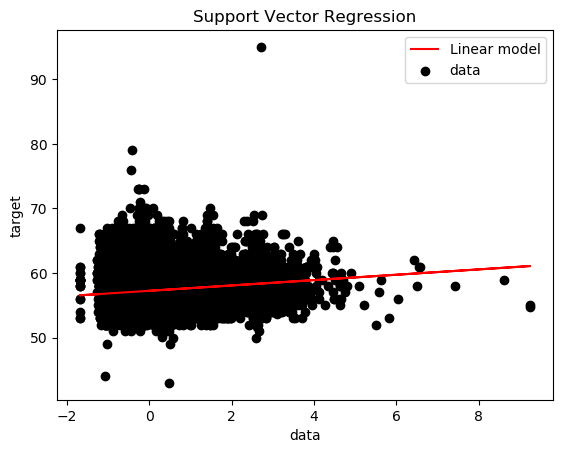

In [157]:
#Only using linear kernel to run faster, can uncomment to use polynomial and radial basis function kernel.
from sklearn.svm import SVR

#svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear')
#svr_poly = SVR(kernel='poly', C=1, degree=2)
#y_rbf = svr_rbf.fit(Xvolume, y).predict(Xvolume)
y_lin = svr_lin.fit(Xvolume, y).predict(Xvolume)
#y_poly = svr_poly.fit(Xvolume, y).predict(Xvolume)

# look at the results
import pylab as pl
pl.scatter(Xvolume, y, c='k', label='data')
pl.hold('on')
#pl.plot(Xvolume, y_rbf, c='g', label='RBF model')
pl.plot(Xvolume, y_lin, c='r', label='Linear model')
#pl.plot(Xvolume, y_poly, c='b', label='Polynomial model')
pl.xlabel('data')
pl.ylabel('target')
pl.title('Support Vector Regression')
pl.legend()
pl.show()

## Random Forest

In [158]:
#Can tune tree depth, number of trees, number of bootstrapped samples
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [159]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/home/alexander/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [160]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 273.23733418297604
Mean Squared Error: 286397.7079271288
Root Mean Squared Error: 535.1613849364777


In [ ]:
#some bullshit i copied
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1 0.856 (0.029)
>0.2 0.879 (0.026)
>0.3 0.881 (0.026)
>0.4 0.890 (0.026)
>0.5 0.896 (0.031)
>0.6 0.897 (0.027)
